# Setting the Stage

In [2]:
# Importing the Python libraries we will use below #
import sys
import numpy as np
import scipy as scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ggplot as gg
import seaborn as sns
from bokeh.plotting import *

In [3]:
# %install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark
%watermark -a 'Rene Clausen Nielsen, UN Global Pulse' -p pandas,numpy,scipy,geolocator,ggplot,matplotlib,mpld3,seaborn,bokeh -d -n -t -z -v -m -g

Rene Clausen Nielsen, UN Global Pulse 28/05/2015 14:37:26 UTC

CPython 2.7.9
IPython 3.1.0

pandas 0.16.1
numpy 1.9.2
scipy 0.15.1
geolocator 0.2.dev0
ggplot 0.6.5
matplotlib 1.4.3
mpld3 0.2
seaborn 0.5.1
bokeh 0.8.2

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 



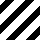
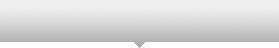
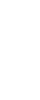
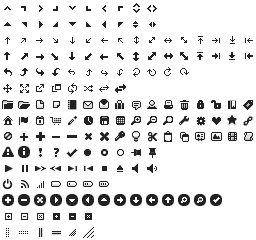
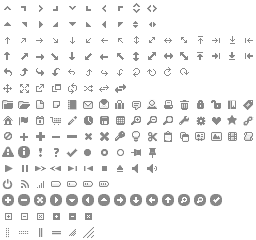
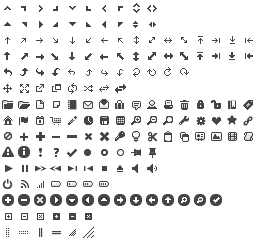
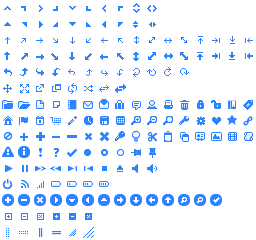
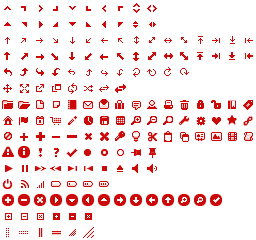
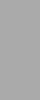
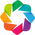
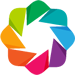
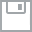
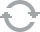
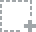
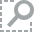
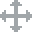
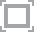
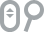

In [4]:
# Setting the chosen graphical styles #
%matplotlib inline
output_notebook()
cmap = sns.diverging_palette(19, 251, s=60, l=30, sep=100, n=11, as_cmap=True)
sns.set_context("poster")
sns.despine()
sns.set_style("whitegrid", {'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 10, 'axes.titlesize': 12, 
                        'xtick.labelsize': 10, 'ytick.labelsize': 10, 'grid.linewidth': .2, 'axes.facecolor': ".97",
                        'grid.color': '.9', 'axes.edgecolor': '.9', 'font.family': ['sans-serif'], 'lines.solid_capstyle': 'round',
                        'font.sans-serif': ['Liberation Sans','Bitstream Vera Sans','sans-serif','Arial'],})

# Getting Population Data

In [5]:
populationData = pd.read_csv('../data/BrazilPopulation.csv', encoding='utf-8',)
populationData.sort("Population", ascending=False)

,City,State,Population
24,São Paulo,SP,11152968
21,Rio de Janeiro,RJ,6320446
22,Salvador,BA,2674923
4,Brasília,DF,2481272
9,Fortaleza,CE,2452185
2,Belo Horizonte,MG,2375151
14,Manaus,AM,1792881
7,Curitiba,PR,1751907
19,Recife,PE,1537704
17,Porto Alegre,RS,1409351


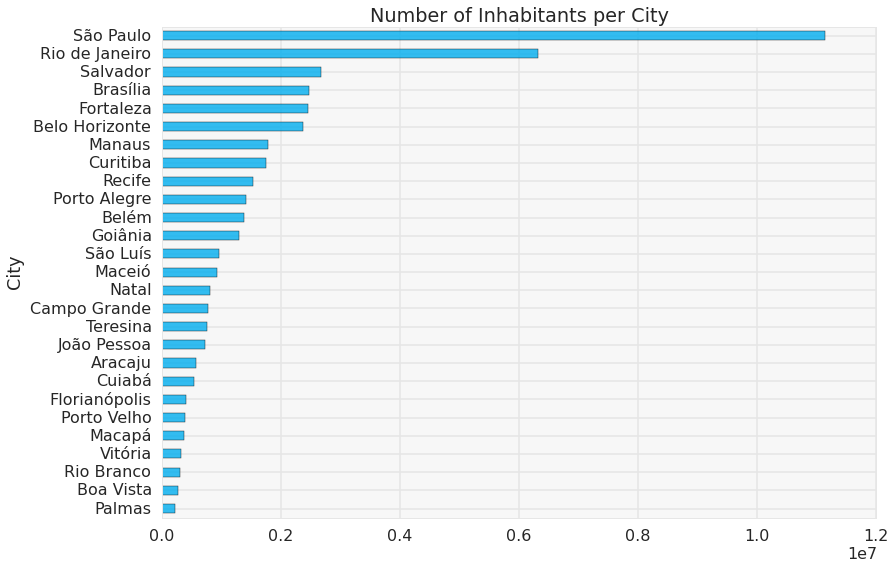

In [6]:
populationData.sort("Population").plot(x = "City",
                   y = "Population",
                   kind = "barh", 
                   title = "Number of Inhabitants per City",
                   legend = False,
                   # colormap = cmap,
                   color = "#00aeef",
                   alpha=0.8)

# Getting the Ground-Truth Data

In [7]:
curitibaData = pd.ExcelFile("../data/groundtruth/curitiba-dasa.xls")

In [8]:
curitibaData.sheet_names

[u'Curitiba HIV Tests (Public)', u'Curitiba HIV Tests (Private)']

In [9]:
curitibaPublic = curitibaData.parse(sheetname=0, header=0, parse_dates=True, index_col=0)

In [10]:
curitibaPublic

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03
HIV tests performed,,,,,,,,,,,,,,,
Primary Health Care services (females),1465,1425,1378,1477,1437,1174,1495,1267,1438,1413,720,686,1352,1277,1628
Primary Health Care services (males),1057,1056,998,1115,1064,840,1197,1009,1250,1187,577,617,1157,912,1169
Pregnant women in public health care,2760,2360,2095,2258,2473,2086,2640,2020,2571,2499,1564,1666,3027,2130,2414
HIV testing center (males),528,358,389,383,348,307,490,404,377,370,405,430,379,437,572
HIV testing center (females),186,133,158,155,155,94,197,158,107,117,111,156,112,144,211
Private lab: DASA Total,4612,4560,4620,4527,4799,4156,4801,4695,4408,4726,4377,3612,4405,4256,5206


In [11]:
# curitibaPublic = curitibaPublic.loc[:,'2014-06':'2014-09'] # Including only months where we also have Twitter data 
# curitibaPublic

## Turning the Table

In [12]:
curitibaPublic = curitibaPublic.transpose()
curitibaPublic

HIV tests performed,Primary Health Care services (females),Primary Health Care services (males),Pregnant women in public health care,HIV testing center (males),HIV testing center (females),Private lab: DASA Total
2014-01,1465,1057,2760,528,186,4612
2014-02,1425,1056,2360,358,133,4560
2014-03,1378,998,2095,389,158,4620
2014-04,1477,1115,2258,383,155,4527
2014-05,1437,1064,2473,348,155,4799
2014-06,1174,840,2086,307,94,4156
2014-07,1495,1197,2640,490,197,4801
2014-08,1267,1009,2020,404,158,4695
2014-09,1438,1250,2571,377,107,4408
2014-10,1413,1187,2499,370,117,4726


In [13]:
curitibaPublic.columns = ['Primary Care, Females', 'Primary Care, Males', 'Pregnant Women', 'HIV Testing, Males',
                          'HIV Testing, Females', 'Private lab: DASA Total'] # Giving the columns fairly short and explanatory names
curitibaPublic = curitibaPublic.drop('Pregnant Women', 1) # Excluding numbers from matenal health facilities as they are tests delivered, not tests made
curitibaPublic

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total
2014-01,1465,1057,528,186,4612
2014-02,1425,1056,358,133,4560
2014-03,1378,998,389,158,4620
2014-04,1477,1115,383,155,4527
2014-05,1437,1064,348,155,4799
2014-06,1174,840,307,94,4156
2014-07,1495,1197,490,197,4801
2014-08,1267,1009,404,158,4695
2014-09,1438,1250,377,107,4408
2014-10,1413,1187,370,117,4726


In [14]:
curitibaPublic.dtypes # Figuring out what datatype each column is read as 

Primary Care, Females      int64
Primary Care, Males        int64
HIV Testing, Males         int64
HIV Testing, Females       int64
Private lab: DASA Total    int64
dtype: object

In [15]:
curitibaPublic.index = pd.to_datetime(curitibaPublic.index) # Making sure that months are read as such

In [16]:
curitibaPublic # Checking that data looks the same after the datatype shenanigans

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total
2014-01-01,1465,1057,528,186,4612
2014-02-01,1425,1056,358,133,4560
2014-03-01,1378,998,389,158,4620
2014-04-01,1477,1115,383,155,4527
2014-05-01,1437,1064,348,155,4799
2014-06-01,1174,840,307,94,4156
2014-07-01,1495,1197,490,197,4801
2014-08-01,1267,1009,404,158,4695
2014-09-01,1438,1250,377,107,4408
2014-10-01,1413,1187,370,117,4726


In [17]:
curitibaPublic['Curitiba Total'] = curitibaPublic.sum(axis=1) # Adding a column with monthly totals
curitibaPublic

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total,Curitiba Total
2014-01-01,1465,1057,528,186,4612,7848
2014-02-01,1425,1056,358,133,4560,7532
2014-03-01,1378,998,389,158,4620,7543
2014-04-01,1477,1115,383,155,4527,7657
2014-05-01,1437,1064,348,155,4799,7803
2014-06-01,1174,840,307,94,4156,6571
2014-07-01,1495,1197,490,197,4801,8180
2014-08-01,1267,1009,404,158,4695,7533
2014-09-01,1438,1250,377,107,4408,7580
2014-10-01,1413,1187,370,117,4726,7813


## Looking at the Ground-Truth Data

Now we'll start having a graphical look at the data. First off we'll create a timeseries graph for each topic and the monthly totals (that is, a timeseries graph for each column)

In [18]:
for col in curitibaPublic:
    fig = figure(                                           # "fig" holds all the global settings
        plot_width = 1000,
        plot_height = 600,
        title = curitibaPublic[col].name,                   # Plot title
        y_axis_label = 'Tests',
        x_axis_label = 'Date',
        title_text_font = 'Oswald',
        title_text_color = '#363636',
        background_fill = '#FAFAFA',                        # Background colour for plot area
        outline_line_color = '#FAFAFA',                     # Colour of line sorrounding plot
        border_fill = '#FAFAFA',                            # Background colour for surrounding area
        x_axis_type = 'datetime',                           # NOTE: only need to define this on first graph
        x_range = (curitibaPublic.index.min(),
                   curitibaPublic.index.max()),             # Setting x-axis to start and end on first and last date of dataset
        y_range = (0,(curitibaPublic[col].max() * 1.1)),    # Setting y-axis to start at 0 and end at highest value (plus 10% to make it prettier)
        #tools="pan,wheel_zoom,box_zoom,reset,previewsave"  # NOTE: only needed on first, if commented out, chooses default tools
        )
    fig.line(                                               # Inserting a line in the chart called "fig"
        curitibaPublic.index,                               # Variable values for the x-axis (index = dates)
        curitibaPublic[col],                                # Variable values for the y-axis (loops over all columns)
        line_color = '#404040',                             # Colour of the line
        line_width = 10,                                    # Width of the line
        line_alpha = 0.7,                                   # Opacity of the line
        #legend = curitibaPublic[col].name,                 # Label name for the legend (column name)
        )
   # legend().label_text_font='Open Sans'
   # legend().label_text_color='#363636'
   # legend().border_line_color='#f6f6f6'
   # axis().axis_label_text_font = "Open Sans"
   # axis().axis_label_text_font_size = "12pt"
   # axis().axis_label_text_color = "#363636"
   # axis().major_label_text_font="Open Sans"
   # axis().major_label_text_font_size="10pt"
   # axis().minor_tick_line_color = "#d4d4d4"
   # xaxis().axis_line_color = '#d4d4d4'
   # xaxis().major_tick_line_color = "#d4d4d4"
   # yaxis().major_tick_line_color = None
   # yaxis().axis_line_color = None
   # xgrid().grid_line_color = None
   # ygrid().grid_line_color = "#d4d4d4"
    show(fig)

Below we'll insert lines for all topics in one chart to better compare.  

In [19]:
fig = figure(
    plot_width = 1000, plot_height = 600, title = 'All Groups', y_axis_label = 'Tests', x_axis_label = 'Date',
    title_text_font = 'Oswald', title_text_color = '#363636', background_fill = '#FAFAFA',
    outline_line_color = '#FAFAFA', border_fill = '#FAFAFA', x_axis_type = 'datetime',
    x_range = (curitibaPublic.index.min(),curitibaPublic.index.max()), y_range = (0,5300),
    )
fig.line(curitibaPublic.index, curitibaPublic["Primary Care, Females"], line_color = '#00aeef', line_width = 5, line_alpha = 0.7,
         legend = "Primary Care, Females")
fig.line(curitibaPublic.index, curitibaPublic["Primary Care, Males"], line_color = '#cf5c42', line_width = 5, line_alpha = 0.7, 
         legend = "Primary Care, Males")
fig.line(curitibaPublic.index, curitibaPublic["HIV Testing, Females"], line_color = '#00447c', line_width = 5, line_alpha = 0.7,
         legend = "HIV Testing, Females")
fig.line(curitibaPublic.index, curitibaPublic["HIV Testing, Males"], line_color = '#e1d8ad', line_width = 5, line_alpha = 0.7,
         legend = "HIV Testing, Males")
fig.line(curitibaPublic.index, curitibaPublic["Private lab: DASA Total"], line_color = '#5d6263', line_width = 5, line_alpha = 0.7,
         legend = "DASA")
#legend().label_text_font='Open Sans'
#legend().label_text_color='#363636'
#legend().border_line_color='#f6f6f6'
#axis().axis_label_text_font = "Open Sans"
#axis().axis_label_text_font_size = "12pt"
#axis().axis_label_text_color = "#363636"
#axis().major_label_text_font="Open Sans"
#axis().major_label_text_font_size="10pt"
#axis().minor_tick_line_color = "#d4d4d4"
#xaxis().axis_line_color = '#d4d4d4'
#xaxis().major_tick_line_color = "#d4d4d4"
#yaxis().major_tick_line_color = None
#yaxis().axis_line_color = None
#xgrid().grid_line_color = None
#ygrid().grid_line_color = "#d4d4d4"
#ygrid().grid_line_width = 0.5
show(fig)

# Correlation Between Test Groups

We can see above that there is some co-variance between the sub-groupings, but July also seems to be a bit of a dividing month. We'll therefore dig a bit further into any potential correlations to see if changes within the sub-groupings are indeed similar. If that is the case, it would imply that there is a large degree of robustness in the data. Or, in other words, if one group gets tested more in one month, so will others, meaning that external factors, such as campaigns or increased risk behavoiur across sub-groupings, could be at play.

First we'll make a simple correlation matrix using Pandas' built-in DataFrame correlations function, [.corr](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). It correlates all columns pairwise using either pearson, kendall, or spearman.

As we're currently looking at timeseries correlations, we'll just use the default: Pearson. 

###Normal Distribution Test
_Pearson assumes that the data is normal distributed. We can't really test that with only four data points per series, but the code below has been readied for furture use._

In [20]:
normalTestPrimaryFemales = scipy.stats.mstats.normaltest(curitibaPublic["Primary Care, Females"])
normalTestPrimaryMales = scipy.stats.mstats.normaltest(curitibaPublic["Primary Care, Males"])
normalTestHIVTestFemales = scipy.stats.mstats.normaltest(curitibaPublic["HIV Testing, Females"])
normalTestHIVTestMales = scipy.stats.mstats.normaltest(curitibaPublic["HIV Testing, Males"])
normalTestTotal = scipy.stats.mstats.normaltest(curitibaPublic["Curitiba Total"])

print('Normal Distribution Test for "Primary Care, Females": %s' % (normalTestPrimaryFemales,))
print('Normal Distribution Test for "Primary Care, Males": %s' % (normalTestPrimaryMales,))
print('Normal Distribution Test for "HIV Testing, Females": %s' % (normalTestHIVTestFemales,))
print('Normal Distribution Test for "HIV Testing, Males": %s' % (normalTestHIVTestMales,))
print('Normal Distribution Test for "Curitiba Total": %s' % (normalTestTotal,))

#curitibaPublic["Primary Care, Females"].normaltest()

Normal Distribution Test for "Primary Care, Females": (10.183630689925293, 0.0061468510974571266)
Normal Distribution Test for "Primary Care, Males": (4.8762898611677077, 0.087322690957151297)
Normal Distribution Test for "HIV Testing, Females": (0.54129509083924487, 0.76288533145558435)
Normal Distribution Test for "HIV Testing, Males": (3.9888908656263116, 0.13608910379542336)
Normal Distribution Test for "Curitiba Total": (4.0607484299447947, 0.13128638262483081)


/home/ubuntu/anaconda/lib/python2.7/site-packages/scipy/stats/mstats_basic.py:1613: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  np.min(n))


###Histograms
_As is the case with narmaltests above, we don't really have enough data points for a histogram to be useful as a visual indicator of being normal distributed, but again, for future use._

## Correlation Matrix

In [21]:
curitibaPublicCorr = curitibaPublic.corr() # Using default method: Pearson
curitibaPublicCorr

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total,Curitiba Total
"Primary Care, Females",1.000000,0.928283,0.222689,0.385662,0.770246,0.942318
"Primary Care, Males",0.928283,1.000000,0.137849,0.238497,0.674439,0.880188
"HIV Testing, Males",0.222689,0.137849,1.000000,0.824896,0.378382,0.399023
"HIV Testing, Females",0.385662,0.238497,0.824896,1.000000,0.496491,0.522953
Private lab: DASA Total,0.770246,0.674439,0.378382,0.496491,1.000000,0.922685
Curitiba Total,0.942318,0.880188,0.399023,0.522953,0.922685,1.000000


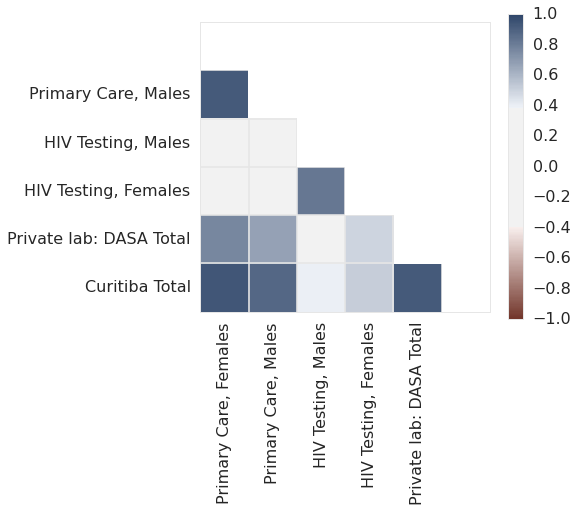

In [22]:
f, ax = plt.subplots(figsize=(8, 8))
sns.corrplot(curitibaPublic, annot=False, sig_stars=True,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

## Main Group Correlations

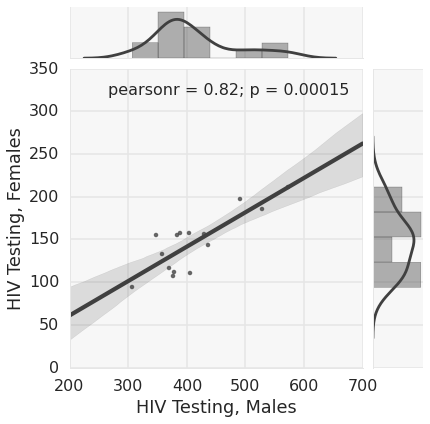

In [23]:
sns.jointplot("HIV Testing, Males", "HIV Testing, Females", curitibaPublic, kind="reg", color="#404040");

# Getting the Twitter Data

In [24]:
# Checking that the data file looks right #
!cat spark/output-final/all.csv | head

city,lat,lon,origdate,topic









cat: write error: Broken pipe


In [25]:
# Read in Twitter data file #
twitterData=pd.read_csv('spark/output-final/all.csv',
                          encoding='utf-8',
                          #header=None,
                          na_values=['NaN',''],
                          parse_dates=[3],
                          index_col=[3]
                        )

In [26]:
twitterData.head()

,city,lat,lon,topic
origdate,,,,
2014-04-03 21:23:26,Recife,-8.057838,-34.882897,Discrimination_Negative
2015-02-07 23:51:00,São Paulo,-23.500000,-46.600000,Discrimination_Negative
2014-11-12 20:35:08,Curitiba,-25.428954,-49.267137,Discrimination_Negative
2014-04-06 12:06:17,Curitiba,-25.428954,-49.267137,Discrimination_Negative
2014-09-13 15:38:28,São Paulo,-23.500000,-46.600000,Discrimination_Negative


In [27]:
twitterDataCounts = pd.DataFrame({"Tweets" : twitterData.groupby(["city"]).size()}).reset_index()
twitterDataCounts.sort("Tweets", ascending=False)

,city,Tweets
24,São Paulo,20908
21,Rio de Janeiro,13271
17,Porto Alegre,10766
7,Curitiba,7546
1,Belo Horizonte,6933
4,Brasília,6492
2,Belém,4257
26,Vitória,3474
8,Florianópolis,3140
19,Recife,3090


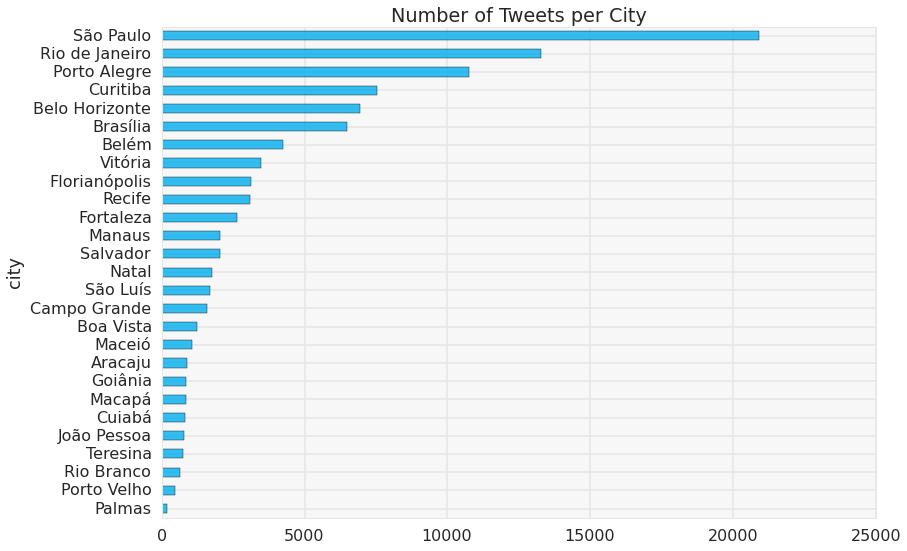

In [28]:
twitterDataCounts.sort("Tweets").plot(x = "city", y = "Tweets", kind = "barh", title = "Number of Tweets per City",
                                legend = False, color="#00aeef", alpha=0.8)

In [29]:
cityData = pd.merge(twitterDataCounts, populationData, how='outer', left_on="city", right_on="City", copy=True)
cityData = cityData[["City","Population","Tweets"]]
cityData

,City,Population,Tweets
0,Aracaju,571149,904
1,Belo Horizonte,2375151,6933
2,Belém,1381475,4257
3,Boa Vista,277799,1232
4,Brasília,2481272,6492
5,Campo Grande,776242,1594
6,Cuiabá,540814,808
7,Curitiba,1751907,7546
8,Florianópolis,405189,3140
9,Fortaleza,2452185,2622


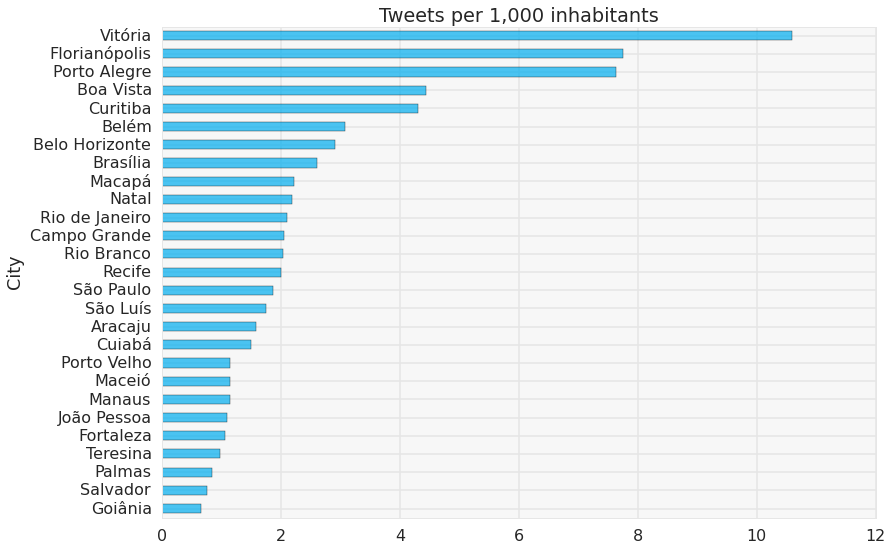

In [47]:
cityData["Tweets per 1,000 inhabitants"] = cityData["Tweets"]/cityData["Population"]*1000
cityData.sort("Tweets per 1,000 inhabitants").plot(x = "City", y = "Tweets per 1,000 inhabitants", kind = "barh", 
                                                   title = "Tweets per 1,000 inhabitants", legend = False,
                                                  color="#00aeef", alpha=0.7)

# Case: Curitiba

In [31]:
twitterDataCuritiba = twitterData[twitterData['city'] == 'Curitiba'] # Getting Curitiba data only
twitterDataSmall = twitterDataCuritiba[['city','topic']] # Getting rid of columns we won't need
twitterDataSmall.head()

,city,topic
origdate,,
2014-11-12 20:35:08,Curitiba,Discrimination_Negative
2014-04-06 12:06:17,Curitiba,Discrimination_Negative
2014-09-19 02:54:41,Curitiba,Discrimination_Negative
2014-03-25 19:49:02,Curitiba,Discrimination_Negative
2014-04-22 06:39:53,Curitiba,Discrimination_Negative


In [32]:
twitterDataSmall.describe()

,city,topic
count,7546,7546
unique,1,7
top,Curitiba,Discrimination_Negative
freq,7546,5697


In [33]:
twitterDataSmall = pd.get_dummies(twitterDataSmall['topic'])
twitterDataSmall.head()

,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral
origdate,,,,,,,
2014-11-12 20:35:08,0,1,0,0,0,0,0
2014-04-06 12:06:17,0,1,0,0,0,0,0
2014-09-19 02:54:41,0,1,0,0,0,0,0
2014-03-25 19:49:02,0,1,0,0,0,0,0
2014-04-22 06:39:53,0,1,0,0,0,0,0


In [34]:
twitterDataSmallAgg = twitterDataSmall.resample('MS', how='sum') # Resampling by summing each topic over each month
twitterDataSmallAgg['Twitter Total'] = twitterDataSmallAgg.sum(axis=1) # Adding a column with monthly totals
# twitterDataSmallAgg = twitterDataSmallAgg.iloc[:4,] # We don't have October data in ground-truth so get rid of that here
twitterDataSmallAgg

,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral,Twitter Total
origdate,,,,,,,,
2014-01-01,6,540,12,1,6,61,1,627
2014-02-01,0,498,38,2,11,63,0,612
2014-03-01,2,509,39,2,21,78,0,651
2014-04-01,0,472,53,1,11,56,1,594
2014-05-01,0,371,38,1,5,46,1,462
2014-06-01,0,415,18,1,9,61,1,505
2014-07-01,5,401,12,2,12,87,2,521
2014-08-01,1,349,59,1,5,53,2,470
2014-09-01,0,349,107,0,7,51,0,514


## Looking at the Twitter Data

In [35]:
for col in twitterDataSmallAgg:
    fig = figure(                                           # "fig" holds all the global settings
        plot_width = 1000,
        plot_height = 600,
        title = twitterDataSmallAgg[col].name,                   # Plot title
        y_axis_label = 'Tweets',
        x_axis_label = 'Date',
        title_text_font = 'Oswald',
        title_text_color = '#363636',
        background_fill = '#FAFAFA',                        # Background colour for plot area
        outline_line_color = '#FAFAFA',                     # Colour of line sorrounding plot
        border_fill = '#FAFAFA',                            # Background colour for surrounding area
        x_axis_type = 'datetime',                           # NOTE: only need to define this on first graph
        x_range = (twitterDataSmallAgg.index.min(),
                   twitterDataSmallAgg.index.max()),             # Setting x-axis to start and end on first and last date of dataset
        y_range = (0,(twitterDataSmallAgg[col].max() * 1.1)),    # Setting y-axis to start at 0 and end at highest value (plus 10% to make it prettier)
        #tools="pan,wheel_zoom,box_zoom,reset,previewsave"  # NOTE: only needed on first, if commented out, chooses default tools
        )
    fig.line(                                               # Inserting a line in the chart called "fig"
        twitterDataSmallAgg.index,                               # Variable values for the x-axis (index = dates)
        twitterDataSmallAgg[col],                                # Variable values for the y-axis (loops over all columns)
        line_color = '#404040',                             # Colour of the line
        line_width = 10,                                    # Width of the line
        line_alpha = 0.7,                                   # Opacity of the line
        #legend = curitibaPublic[col].name,                 # Label name for the legend (column name)
        )
    #legend().label_text_font='Open Sans'
    #legend().label_text_color='#363636'
    #legend().border_line_color='#f6f6f6'
    #axis().axis_label_text_font = "Open Sans"
    #axis().axis_label_text_font_size = "12pt"
    #axis().axis_label_text_color = "#363636"
    #axis().major_label_text_font="Open Sans"
    #axis().major_label_text_font_size="10pt"
    #axis().minor_tick_line_color = "#d4d4d4"
    #xaxis().axis_line_color = '#d4d4d4'
    #xaxis().major_tick_line_color = "#d4d4d4"
    #yaxis().major_tick_line_color = None
    #yaxis().axis_line_color = None
    #xgrid().grid_line_color = None
    #ygrid().grid_line_color = "#d4d4d4"
    #ygrid().grid_line_width = 0.5
    show(fig)

In [36]:
curitibaTwitterCorr = twitterDataSmallAgg.corr() # Using default method: Pearson
curitibaTwitterCorr

,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral,Twitter Total
Campaign_Portuguese,1.000000,-0.173546,-0.283673,-0.126847,0.155188,0.157308,0.720007,-0.171034
Discrimination_Negative,-0.173546,1.000000,-0.236608,0.124414,-0.237682,-0.033660,-0.591547,0.966719
Discrimination_Positive,-0.283673,-0.236608,1.000000,-0.292206,-0.264764,-0.506955,-0.130878,-0.104225
Prevention_Negative,-0.126847,0.124414,-0.292206,1.000000,-0.007390,0.106317,-0.302603,0.065439
Prevention_Neutral,0.155188,-0.237682,-0.264764,-0.007390,1.000000,0.516719,0.307874,-0.120481
Prevention_Positive,0.157308,-0.033660,-0.506955,0.106317,0.516719,1.000000,0.254708,0.065843
Testing_Neutral,0.720007,-0.591547,-0.130878,-0.302603,0.307874,0.254708,1.000000,-0.552325
Twitter Total,-0.171034,0.966719,-0.104225,0.065439,-0.120481,0.065843,-0.552325,1.000000


# Merging Data

In [37]:
df = pd.merge(curitibaPublic, twitterDataSmallAgg, how='left', on=None, left_on=None, right_on=None,
      left_index=True, right_index=True, sort=True,
      suffixes=('_x', '_y'), copy=True)

In [38]:
df

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total,Curitiba Total,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral,Twitter Total
2014-01-01,1465,1057,528,186,4612,7848,6,540,12,1,6,61,1,627
2014-02-01,1425,1056,358,133,4560,7532,0,498,38,2,11,63,0,612
2014-03-01,1378,998,389,158,4620,7543,2,509,39,2,21,78,0,651
2014-04-01,1477,1115,383,155,4527,7657,0,472,53,1,11,56,1,594
2014-05-01,1437,1064,348,155,4799,7803,0,371,38,1,5,46,1,462
2014-06-01,1174,840,307,94,4156,6571,0,415,18,1,9,61,1,505
2014-07-01,1495,1197,490,197,4801,8180,5,401,12,2,12,87,2,521
2014-08-01,1267,1009,404,158,4695,7533,1,349,59,1,5,53,2,470
2014-09-01,1438,1250,377,107,4408,7580,0,349,107,0,7,51,0,514
2014-10-01,1413,1187,370,117,4726,7813,0,344,62,3,8,40,0,457


# Comparisons

In [39]:
dfNoTotals = df.drop(df.columns[[5, 13]], axis=1)
dfNoTotalsCorr = dfNoTotals.corr() # Using default method: Pearson
dfNoTotalsCorr

,"Primary Care, Females","Primary Care, Males","HIV Testing, Males","HIV Testing, Females",Private lab: DASA Total,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral
"Primary Care, Females",1.000000,0.928283,0.222689,0.385662,0.770246,-0.067183,0.419378,0.188460,-0.050735,-0.409009,-0.039294,-0.034574
"Primary Care, Males",0.928283,1.000000,0.137849,0.238497,0.674439,-0.140317,0.284962,0.362658,-0.056928,-0.332257,-0.131103,-0.108993
"HIV Testing, Males",0.222689,0.137849,1.000000,0.824896,0.378382,0.864737,-0.099670,-0.186004,-0.075539,-0.086833,0.250205,0.624729
"HIV Testing, Females",0.385662,0.238497,0.824896,1.000000,0.496491,0.740888,0.171614,-0.241764,-0.015288,-0.182117,0.134543,0.474609
Private lab: DASA Total,0.770246,0.674439,0.378382,0.496491,1.000000,0.018468,0.156060,0.107902,0.224829,-0.610046,-0.033485,0.035040
Campaign_Portuguese,-0.067183,-0.140317,0.864737,0.740888,0.018468,1.000000,-0.173546,-0.283673,-0.126847,0.155188,0.157308,0.720007
Discrimination_Negative,0.419378,0.284962,-0.099670,0.171614,0.156060,-0.173546,1.000000,-0.236608,0.124414,-0.237682,-0.033660,-0.591547
Discrimination_Positive,0.188460,0.362658,-0.186004,-0.241764,0.107902,-0.283673,-0.236608,1.000000,-0.292206,-0.264764,-0.506955,-0.130878
Prevention_Negative,-0.050735,-0.056928,-0.075539,-0.015288,0.224829,-0.126847,0.124414,-0.292206,1.000000,-0.007390,0.106317,-0.302603
Prevention_Neutral,-0.409009,-0.332257,-0.086833,-0.182117,-0.610046,0.155188,-0.237682,-0.264764,-0.007390,1.000000,0.516719,0.307874


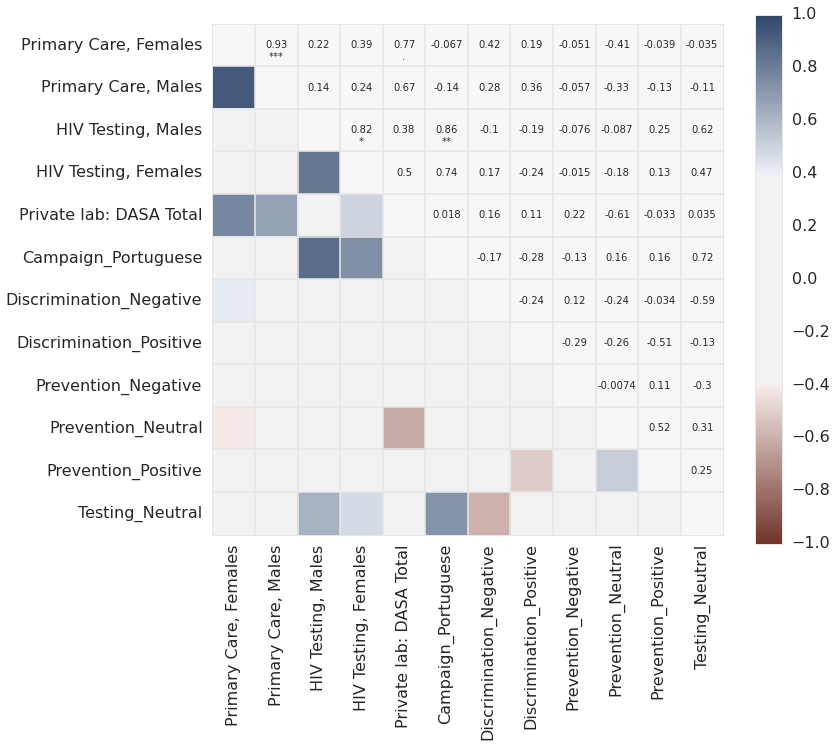

In [40]:
f, ax = plt.subplots(figsize=(12, 12))
sns.corrplot(dfNoTotals, annot=True, sig_stars=True, diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [41]:
dfTotals = df[["Curitiba Total", "Twitter Total"]]
dfTotalsCorr = dfTotals.corr() # Using default method: Pearson
dfTotalsCorr

,Curitiba Total,Twitter Total
Curitiba Total,1.000000,0.296961
Twitter Total,0.296961,1.000000


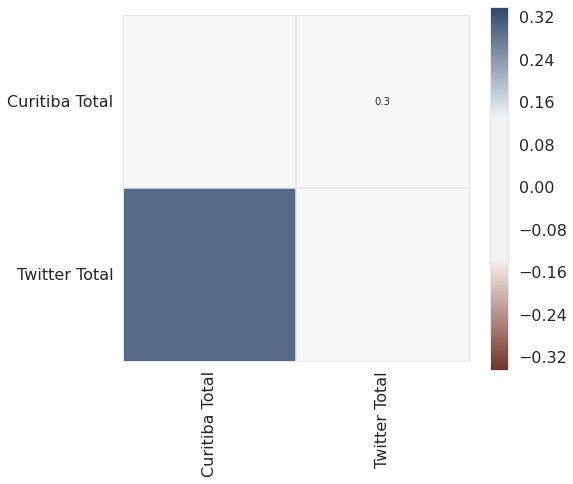

In [42]:
f, ax = plt.subplots(figsize=(8, 8))
sns.corrplot(dfTotals, annot=True, sig_stars=True, diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [43]:
dfTotals["Curitiba Tests Total"] = dfTotals["Curitiba Total"].sum()
dfTotals["Curitiba Tweets Total"] = dfTotals["Twitter Total"].sum()
dfTotals["Curitiba Tests Total %"] = dfTotals["Curitiba Total"]/dfTotals["Curitiba Tests Total"]*100
dfTotals["Curitiba Tweets Total %"] = dfTotals["Twitter Total"]/dfTotals["Curitiba Tweets Total"]*100

/home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [44]:
dfTotals

,Curitiba Total,Twitter Total,Curitiba Tests Total,Curitiba Tweets Total,Curitiba Tests Total %,Curitiba Tweets Total %
2014-01-01,7848,627,110968,7546,7.072309,8.309038
2014-02-01,7532,612,110968,7546,6.787542,8.110257
2014-03-01,7543,651,110968,7546,6.797455,8.627087
2014-04-01,7657,594,110968,7546,6.900187,7.871720
2014-05-01,7803,462,110968,7546,7.031757,6.122449
2014-06-01,6571,505,110968,7546,5.921527,6.692287
2014-07-01,8180,521,110968,7546,7.371494,6.904320
2014-08-01,7533,470,110968,7546,6.788444,6.228465
2014-09-01,7580,514,110968,7546,6.830798,6.811556
2014-10-01,7813,457,110968,7546,7.040769,6.056189


In [45]:
fig = figure(
    plot_width = 1000, plot_height = 600, title = 'Tests vs. Tweets', y_axis_label = 'Monthly %', x_axis_label = 'Month',
    title_text_font = 'Oswald', title_text_color = '#363636', background_fill = '#FAFAFA',
    outline_line_color = '#FAFAFA', border_fill = '#FAFAFA', x_axis_type = 'datetime',
    x_range = (dfTotals.index.min(),dfTotals.index.max()), y_range = (0,10),
    )
fig.line(dfTotals.index, dfTotals["Curitiba Tests Total %"], line_color = '#cf5c42', line_width = 5, line_alpha = 0.7, 
         legend = "Curitiba Tests"),
fig.line(dfTotals.index, dfTotals["Curitiba Tweets Total %"], line_color = '#00447c', line_width = 5, line_alpha = 0.7,
         legend = "Curitiba Tweets")
show(fig)

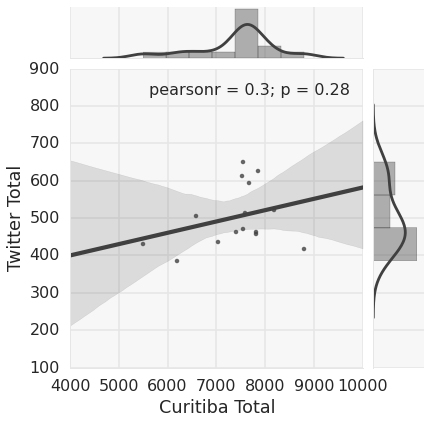

In [46]:
sns.jointplot("Curitiba Total", "Twitter Total", dfTotals, kind="reg", color="#404040");

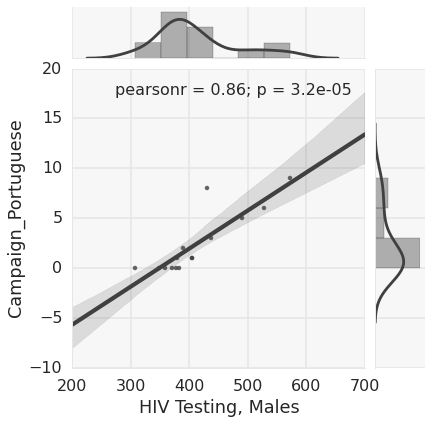

In [96]:
sns.jointplot("HIV Testing, Males", "Campaign_Portuguese", df, kind="reg", color="#404040");

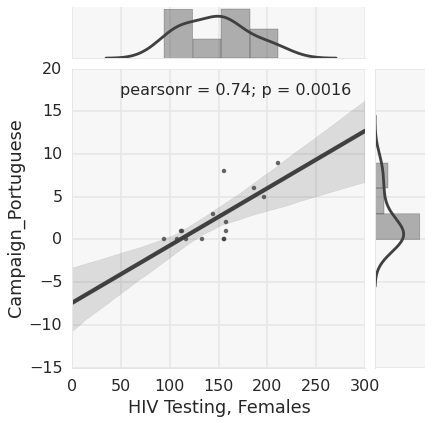

In [97]:
sns.jointplot("HIV Testing, Females", "Campaign_Portuguese", df, kind="reg", color="#404040");

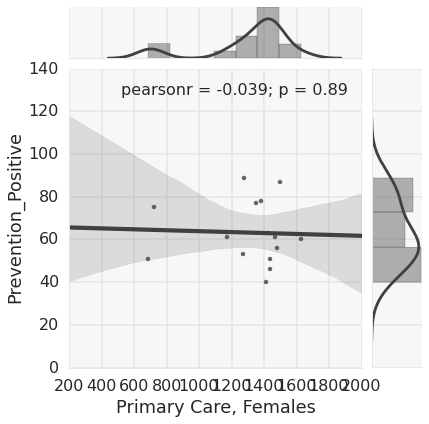

In [98]:
sns.jointplot("Primary Care, Females", "Prevention_Positive", df, kind="reg", color="#404040");

# Anomaly Detection

We can only do anomaly detection on tweets, because we don't have enough data points for our ground-truth data. As we have very fine temporal information for all tweets (seconds), we can resample to look at hourly and daily aggregates. That shulkd give us enough data for anomaly detection.

First we resample to daily aggregates.

In [55]:
twitterDataDailyAgg = twitterDataSmall.resample('D', how='sum') # Resampling by summing each topic over each day
twitterDataDailyAgg['Twitter Total'] = twitterDataDailyAgg.sum(axis=1) # Adding a column with monthly totals
# twitterDataSmallAgg = twitterDataSmallAgg.iloc[:4,] # We don't have October data in ground-truth so get rid of that here
twitterDataDailyAgg.head()

,Campaign_Portuguese,Discrimination_Negative,Discrimination_Positive,Prevention_Negative,Prevention_Neutral,Prevention_Positive,Testing_Neutral,Twitter Total
origdate,,,,,,,,
2014-01-01,0,15,0,0,0,1,0,16
2014-01-02,0,16,0,0,0,0,0,16
2014-01-03,0,15,0,0,0,0,0,15
2014-01-04,0,13,0,0,2,4,0,19
2014-01-05,0,12,0,0,0,4,0,16


As we'll be using [r](http://www.r-project.org/) instead of Python for this, we'll use IPyhon's built-in r interpreter using the so called [Magic Functions](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).

In [56]:
%load_ext rmagic 

/home/ubuntu/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [57]:
%R library(AnomalyDetection)

<StrVector - Python:0x7f6b1d9e5bd8 / R:0x3a06f68>
[str, str, str, ..., str, str, str]

In [58]:
# %%R
# help(AnomalyDetectionTs)
# help(AnomalyDetectionVec)

In [59]:
df_r = twitterDataDailyAgg['Twitter Total']
df_r.to_csv('TwitterDailyAgg.csv', header=['Twitter Total'], date_format='%Y-%m-%d')

In [60]:
!cat TwitterDailyAgg.csv | head

origdate,Twitter Total
2014-01-01,16.0
2014-01-02,16.0
2014-01-03,15.0
2014-01-04,19.0
2014-01-05,16.0
2014-01-06,21.0
2014-01-07,28.0
2014-01-08,14.0
2014-01-09,14.0


In [61]:
%%R

df_r = read.csv("TwitterDailyAgg.csv", stringsAsFactors=FALSE)

In [62]:
%R data(df_r)

<StrVector - Python:0x7f6b1d9e5878 / R:0x5cf56d8>
[str]

In [63]:
%R df_r

<DataFrame - Python:0x7f6b1d8fcef0 / R:0x4e64a38>
[StrVector, FloatVector]
  origdate: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7f6b1d9795f0 / R:0x5baeb60>
[str, str, str, ..., str, str, str]
  Twitter.Total: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7f6b1d9797e8 / R:0x5baf9d0>
[16.000000, 16.000000, 15.000000, ..., 11.000000, 12.000000, 17.000000]

In [64]:
%%R
data(df_r)
res = AnomalyDetectionTs(df_r, max_anoms=0.02, direction='both', plot=TRUE)
res$plot

Error in R_idx[i] <- data[[1]][temp_max_idx] : 
  replacement has length zero
In addition: Warning messages:
1: In data(df_r) : data set ‘df_r’ not found
2: In data(df_r) : data set ‘df_r’ not found
3: In max(ares) : no non-missing arguments to max; returning -Inf
4: In max(ares) : no non-missing arguments to max; returning -Inf
Error in R_idx[i] <- data[[1]][temp_max_idx] : 
  replacement has length zero


# DELETE

In [51]:
%R raw_data

array([ <DataFrame - Python:0x7f36222810e0 / R:0x6e78748>
[Float..., IntVe..., IntVe..., ..., IntVe..., IntVe..., IntVe...]
  <no name>: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7f3622281488 / R:0x785a320>
[0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000]
  <no name>: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7f36222e9ea8 / R:0x6611f80>
[       1,        2,        3, ...,       56,       57,       58]
  <no name>: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7f36222e92d8 / R:0x7aae890>
[      14,       14,       14, ...,       13,       13,       13]
  ...
  <no name>: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7f36222e93f8 / R:0x6891040>
[       4,        4,        4, ...,        0,        0,        0]
  <no name>: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7f36222e9488 / R:0x76d8910>
[     268,      268,      268, ...,      278,      278,      278]
 

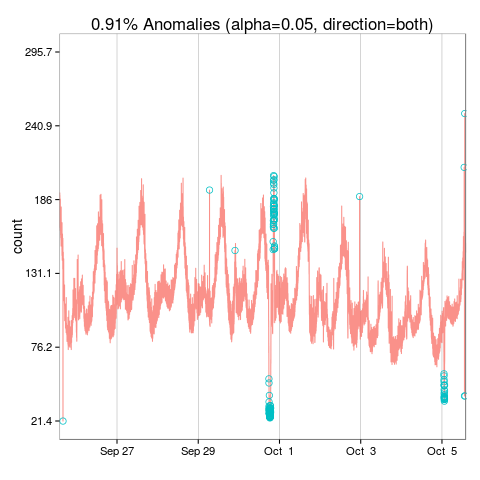

In [52]:
%%R

data(raw_data)
res = AnomalyDetectionTs(raw_data, max_anoms=0.02, direction='both', plot=TRUE)
res$plot

# Styling

In [1]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)